In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('creditcard.csv')
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
print("dimension of df data:{}".format(data.shape))
print(data.groupby('Class').size())

dimension of df data:(284807, 31)
Class
0    284315
1       492
dtype: int64


Text(0, 0.5, 'Frequency')

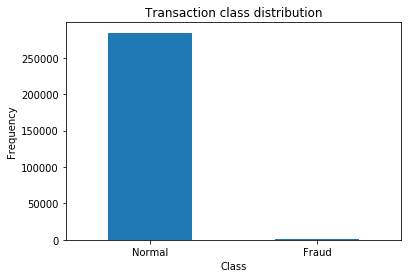

In [4]:
LABELS = ["Normal", "Fraud"]
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [6]:

from sklearn.preprocessing import StandardScaler
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data['Time'] = StandardScaler().fit_transform(data['Time'].values.reshape(-1, 1))

In [7]:
from sklearn.model_selection import train_test_split
data_x=pd.DataFrame([
data["Time"],
data["Amount"],
data["V1"],             
data["V2"],
data["V3"],
data["V4"],
data["V5"],
data["V6"],
data["V7"],
data["V8"],
data["V9"],
data["V10"],
data["V11"],
data["V12"],
data["V13"],
data["V14"],             
data["V15"],
data["V16"],
data["V17"],
data["V18"],
data["V19"],
data["V20"],
data["V21"],
data["V22"],
data["V23"],
data["V24"],
data["V25"],
data["V26"],
data["V27"],
data["V28"]
]).T

data_y=data["Class"]
          
train_x, test_x, train_y, test_y = train_test_split(data_x,data_y,test_size=0.2)

In [8]:
from sklearn import ensemble, preprocessing, metrics, svm
from sklearn.model_selection import cross_validate

In [9]:
forest = ensemble.RandomForestClassifier(n_estimators = 400,class_weight='balanced')

In [10]:
forest_fit = forest.fit(train_x, train_y)

In [11]:
test_y_predicted = forest.predict(test_x)

In [12]:
accuracy = metrics.accuracy_score(test_y, test_y_predicted)
print(accuracy)

pre_y = forest.predict(test_x)
precision_s = metrics.precision_score(test_y, pre_y)
print(precision_s)
recall_s = metrics.recall_score(test_y, pre_y)
print(recall_s)
matrix=metrics.confusion_matrix(test_y,pre_y,labels=None,sample_weight=None)
print(matrix)

0.9995786664794073
0.9354838709677419
0.8285714285714286
[[56851     6]
 [   18    87]]


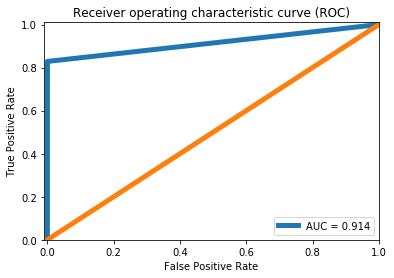

In [13]:
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
false_pos_rate, true_pos_rate, thresholds = roc_curve(test_y, pre_y)
roc_auc = auc(false_pos_rate, true_pos_rate,)

plt.plot(false_pos_rate, true_pos_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=5)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [14]:
forest = ensemble.RandomForestClassifier(n_estimators = 400)

In [15]:
forest_fit = forest.fit(train_x, train_y)

In [16]:
test_y_predicted = forest.predict(test_x)

In [17]:
accuracy = metrics.accuracy_score(test_y, test_y_predicted)
print(accuracy)

pre_y = forest.predict(test_x)
precision_s = metrics.precision_score(test_y, pre_y)
print(precision_s)
recall_s = metrics.recall_score(test_y, pre_y)
print(recall_s)
matrix=metrics.confusion_matrix(test_y,pre_y,labels=None,sample_weight=None)
print(matrix)

0.9995962220427653
0.9270833333333334
0.8476190476190476
[[56850     7]
 [   16    89]]


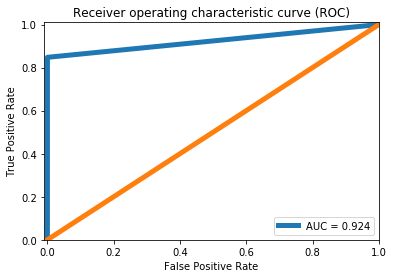

In [18]:
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
false_pos_rate, true_pos_rate, thresholds = roc_curve(test_y, pre_y)
roc_auc = auc(false_pos_rate, true_pos_rate,)

plt.plot(false_pos_rate, true_pos_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=5)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
df_x=pd.DataFrame([
df["Time"],
df["Amount"],
df["V1"],             
df["V2"],
df["V3"],
df["V4"],
df["V5"],
df["V6"],
df["V7"],
df["V8"],
df["V9"],
df["V10"],
df["V11"],
df["V12"],
df["V13"],
df["V14"],             
df["V15"],
df["V16"],
df["V17"],
df["V18"],
df["V19"],
df["V20"],
df["V21"],
df["V22"],
df["V23"],
df["V24"],
df["V25"],
df["V26"],
df["V27"],
df["V28"]
]).T

df_y=df["Class"]
          
train_x, test_x, train_y, test_y = train_test_split(df_x,df_y,test_size=0.2)

In [10]:
svc = svm.SVC()
svc_fit = svc.fit(train_x, train_y)

C:\Users\LU\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [11]:
pre_y = svc.predict(test_x)

In [13]:
accuracy = metrics.accuracy_score(test_y, pre_y)
print(accuracy)
precision_s = metrics.precision_score(test_y, pre_y)
print(precision_s)
recall_s = metrics.recall_score(test_y, pre_y)
print(recall_s)
matrix=metrics.confusion_matrix(test_y,pre_y,labels=None,sample_weight=None)
print(matrix)

0.9984024437344194
1.0
0.061855670103092786
[[56865     0]
 [   91     6]]


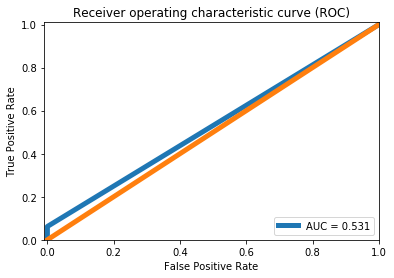

In [16]:
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
false_pos_rate, true_pos_rate, thresholds = roc_curve(test_y, pre_y)
roc_auc = auc(false_pos_rate, true_pos_rate,)

plt.plot(false_pos_rate, true_pos_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=5)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
df_x=pd.DataFrame([
df["Time"],
df["Amount"],
df["V1"],             
df["V2"],
df["V3"],
df["V4"],
df["V5"],
df["V6"],
df["V7"],
df["V8"],
df["V9"],
df["V10"],
df["V11"],
df["V12"],
df["V13"],
df["V14"],             
df["V15"],
df["V16"],
df["V17"],
df["V18"],
df["V19"],
df["V20"],
df["V21"],
df["V22"],
df["V23"],
df["V24"],
df["V25"],
df["V26"],
df["V27"],
df["V28"]
]).T

df_y=df["Class"]
          
train_x, test_x, train_y, test_y = train_test_split(df_x,df_y,test_size=0.2)

In [16]:
svc = svm.SVC(class_weight='balanced')
svc_fit = svc.fit(train_x, train_y)

C:\Users\LU\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [17]:
accuracy = metrics.accuracy_score(test_y, pre_y)
print(accuracy)
precision_s = metrics.precision_score(test_y, pre_y)
print(precision_s)
recall_s = metrics.recall_score(test_y, pre_y)
print(recall_s)
matrix=metrics.confusion_matrix(test_y,pre_y,labels=None,sample_weight=None)
print(matrix)

0.9967697763421228
0.0
0.0
[[56778    74]
 [  110     0]]


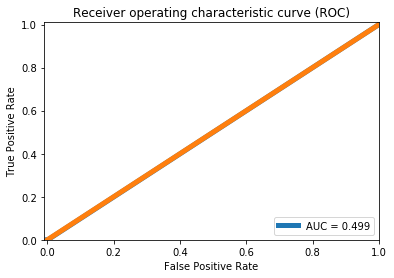

In [18]:
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
false_pos_rate, true_pos_rate, thresholds = roc_curve(test_y, pre_y)
roc_auc = auc(false_pos_rate, true_pos_rate,)

plt.plot(false_pos_rate, true_pos_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=5)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()